# Лабораторная работа №5
# Исследование модели хищник-жертва

$\frac{dN}{dt} = (\alpha -cM) N$

$\frac{dM}{dt} = (\beta + dN) M$

In [3]:
import numpy as np
from scipy.constants import g, pi
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.integrate import solve_ivp

In [4]:
%matplotlib notebook
style = {'description_width': 'initial'}

## простейшая модель

<IPython.core.display.Javascript object>


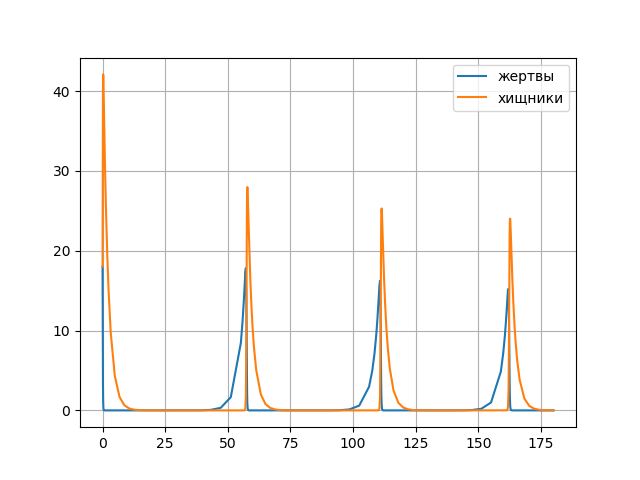

<IPython.core.display.Javascript object>


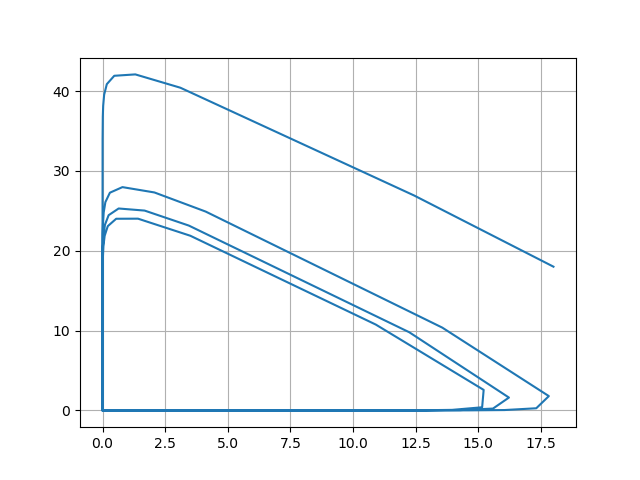

In [7]:
def predator_prey_model(t, y, a, b, c, d):
    return np.array([(a(t)-c(t)*y[1])*y[0], (-b(t) + d(t)*y[0])*y[1]])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['жертвы', 'хищники'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()

def predator_prey_plotter(a, b, c, d, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    solve = solve_ivp(lambda t, y: predator_prey_model(t, y, lambda t: a, lambda t: b, lambda t: c, lambda t: d),
                      (0,max_time), [start_value_N, start_value_M])
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('жертвы', 'хищники'))

In [8]:
interact(predator_prey_plotter,
    a=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    b=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.3),
    c=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.2),
    d=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.2),
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=100),
    start_value_N=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style),
    start_value_M=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style)
);

interactive(children=(FloatSlider(value=0.4, description='a', max=1.0, step=0.001), FloatSlider(value=0.3, des…

## Фазовая траектория

<IPython.core.display.Javascript object>


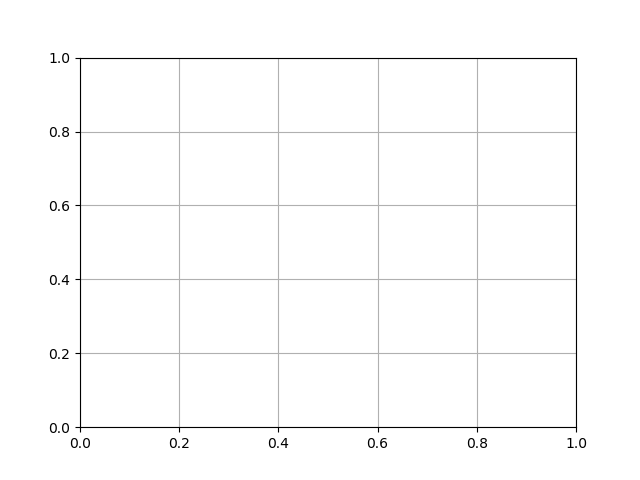

In [20]:
def predator_prey_phase(t, y, a, b, c, d):
    return (a(t)-c(t)*t)*y/((-b(t)+d(t)*y)*t)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()

def predator_prey_phase_plotter(a, b, c, d, start_value_M, start_value_N, max_M):
    ax.clear()
    ax.grid()
    solve = solve_ivp(lambda t, y: predator_prey_phase(t, y, lambda t: a, lambda t: b, lambda t: c, lambda t: d),
                      (start_value_M,max_M), [start_value_N], method='LSODA')
    
    l1, = ax.plot(solve['t'], solve['y'][0])

In [21]:
interact_manual(predator_prey_phase_plotter,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.4),
    b=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.3),
    c=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.2),
    d=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.2),
    start_value_N=widgets.IntSlider(min=2, max=200, step=1, value=2,style = style),
    start_value_M=widgets.IntSlider(min=2, max=200, step=1, value=2,style = style),
    max_M=widgets.IntSlider(min=10, max=10000, step=1, value=10,style = style)
);

interactive(children=(FloatSlider(value=0.4, description='a', max=1.0, step=0.01), FloatSlider(value=0.3, desc…